# 데이터 출처 - 공공데이터포털

- 한국전력공사_서울시 전기차 충전소 충전량
- https://www.data.go.kr/data/15100212/fileData.do
- 2021.1.1-2022.3.31 기간의 서울시에 위치하고 있는 한국전력공사의 전기차 충전소의 충전량을 제공합니다.
- 데이터 사이즈가 큰 관계로 21년도 데이터만 사용합니다.<br>참고 : https://colab.research.google.com/drive/1EkpAURXDs5mpLRpIVtlImUayJBgiOPiX#scrollTo=KZYY5LGUIQ1Q&uniqifier=1

### 분석 목표

- 서울시내 데이터가 많은 충전소 하나 선택 후 사용 유형 및 충전량 분석
-

### 기본설정

In [1]:
# 구글마운트
from google.colab import drive
drive.mount('/content/drive')

# 한글폰트
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Mounted at /content/drive
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 19 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (10.2 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database 

In [1]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [71]:
# 주피터에서 실행하는 한글패치
# 단점 매번 실행 시켜야됨...
import matplotlib.pyplot as plt
# %matplotlib inline

#from matplotlib import font_manager, rc

#f_path = 'c:/Windows/Fonts/malgun.ttf'
#font_name = font_manager.FontProperties(fname=f_path).get_name()
#rc('font', family=font_name)

### 데이터 불러오기 및 수정(drop, endcoding, new_column)

In [2]:
# 패키지 설정
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = '/content/drive/MyDrive/새싹교육/미니프로젝트/서울시 전기차 충전소 충전량/21년도_서울시_전기차_충전소.csv'

# 주피터에서 실행할시
#file_path = './21년도_서울시_전기차_충전소.csv'
df = pd.read_csv(file_path)

In [4]:
df.head()

,Unnamed: 0,충전구분,충전소명,주소,충전기용량,충전량,충전시간,충전분,충전시작시각,충전종료시각,시작_연도,시작_월,시작_일,시작_시,시작_분,종료_연도,종료_월,종료_일,종료_시,종료_분
0,0,급속,영등포전력지사,서울특별시 영등포구 경인로 878,50,0.05,0,0,2021-01-01 02:06:20,2021-01-01 02:06:36,2021,1,1,2,6,2021,1,1,2,6
1,1,급속,영등포전력지사,서울특별시 영등포구 경인로 878,50,13.10,0,29,2021-01-02 14:58:37,2021-01-02 15:28:25,2021,1,2,14,58,2021,1,2,15,28
2,2,급속,영등포전력지사,서울특별시 영등포구 경인로 878,50,47.56,1,33,2021-01-02 20:57:53,2021-01-02 22:31:46,2021,1,2,20,57,2021,1,2,22,31
3,3,급속,영등포전력지사,서울특별시 영등포구 경인로 878,50,24.77,0,38,2021-01-04 12:12:02,2021-01-04 12:51:01,2021,1,4,12,12,2021,1,4,12,51
4,4,급속,영등포전력지사,서울특별시 영등포구 경인로 878,50,19.21,0,29,2021-01-04 22:51:11,2021-01-04 23:21:04,2021,1,4,22,51,2021,1,4,23,21


#### 컬럼 수정

In [5]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
# 시간 -> 분으로 변경
df['총_충전분'] = df['충전시간'] * 60 + df['충전분']

In [7]:
# 시작, 종료 데이터 -> 평일, 주말 구분
from datetime import datetime, date

new = []
for y, m, d in  df[['시작_연도', '시작_월', '시작_일']].to_numpy():

    day = datetime(y, m, d)
    day_num = day.weekday()
    if day_num == 5 or day_num ==6:
        # 주말
        day_num = '주말'
        new.append(day_num)
    else:
        # 평일
        day_num = '평일'
        new.append(day_num)

df['평일_주말'] = new

In [8]:
# 주소 컬럼데이터 확인
df['주소'].unique()

array(['서울특별시 영등포구 경인로 878', '경기도 하남시 감북로 80', '서울특별시 강동구 구천면로 395(명일동)',
       '서울특별시 송파구 신천동 29-5 송파구청 앞', '서울특별시 송파구 송파동 오금로32길 14',
       '서울특별시 송파구 가락동 154', '서울특별시 강동구 둔촌동 522-9',
       '서울특별시 강동구 강일동 아리수로93길 40', '서울특별시 송파구 양재대로 932',
       '서울특별시 송파구 장지동 516', '서울특별시 강동구 구천면로 42길 60(천호동)',
       '서울특별시 송파구 잠실동 잠실로 88', '서울특별시 송파구 올림픽로 135',
       '서울특별시 강동구 성내동 풍성로 128', '서울특별시 강동구 천호동 천호대로 1089',
       '서울특별시 송파구 거여동 양산로4길 8', '서울특별시 송파구 거여동 195-1',
       '서울특별시 송파구 위례광장로 163 (장지동, 위례22단지)', '서울특별시 송파구 신천동 7-11',
       '서울특별시 강동구 명일동 260-1', '서울특별시 송파구 가락동 동남로 193',
       '서울특별시 송파구 풍납동 403-11', '서울특별시 강동구 양재대로 1571',
       '서울특별시 송파구 가락동 송파대로28길 27', '서울특별시 송파구 올림픽로35길 93',
       '서울특별시 송파구 신천동 올림픽로 269', '서울특별시 강동구 올림픽로 664',
       '서울특별시 송파구 송파대로 8길 17', '서울특별시 송파구 마천동 성내천로47길 38',
       '서울특별시 송파구 성내천로43길 6', '서울특별시 송파구 장지동 충민로4길 5',
       '서울특별시 송파구 충민로6길 14', '서울특별시 송파구 잠실동 40',
       '서울특별시 강동구 천호대로 1239(길동)', '서울특별시 송파구 장지동 위례광장로 215',
       '서울특별시 송파구

In [9]:
# 주소 컬럼에서 서울 자치구 분리
df['자치구'] = df['주소'].str.extract('(\w*구)')

In [10]:
# 데이터 정보확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487504 entries, 0 to 487503
Data columns (total 22 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   충전구분    487504 non-null  object 
 1   충전소명    487504 non-null  object 
 2   주소      487504 non-null  object 
 3   충전기용량   487504 non-null  int64  
 4   충전량     487504 non-null  float64
 5   충전시간    487504 non-null  int64  
 6   충전분     487504 non-null  int64  
 7   충전시작시각  487504 non-null  object 
 8   충전종료시각  487504 non-null  object 
 9   시작_연도   487504 non-null  int64  
 10  시작_월    487504 non-null  int64  
 11  시작_일    487504 non-null  int64  
 12  시작_시    487504 non-null  int64  
 13  시작_분    487504 non-null  int64  
 14  종료_연도   487504 non-null  int64  
 15  종료_월    487504 non-null  int64  
 16  종료_일    487504 non-null  int64  
 17  종료_시    487504 non-null  int64  
 18  종료_분    487504 non-null  int64  
 19  총_충전분   487504 non-null  int64  
 20  평일_주말   487504 non-null  object 
 21  자치구     47

In [11]:
# Nan값 존재 X
df.isnull().sum()

충전구분         0
충전소명         0
주소           0
충전기용량        0
충전량          0
충전시간         0
충전분          0
충전시작시각       0
충전종료시각       0
시작_연도        0
시작_월         0
시작_일         0
시작_시         0
시작_분         0
종료_연도        0
종료_월         0
종료_일         0
종료_시         0
종료_분         0
총_충전분        0
평일_주말        0
자치구       7757
dtype: int64

In [12]:
# 자치구에 있는 nan 행 제거
df.dropna(axis=0, inplace=True)

In [13]:
df.isnull().sum()

충전구분      0
충전소명      0
주소        0
충전기용량     0
충전량       0
충전시간      0
충전분       0
충전시작시각    0
충전종료시각    0
시작_연도     0
시작_월      0
시작_일      0
시작_시      0
시작_분      0
종료_연도     0
종료_월      0
종료_일      0
종료_시      0
종료_분      0
총_충전분     0
평일_주말     0
자치구       0
dtype: int64

In [14]:
df['자치구'].unique()

array(['영등포구', '강동구', '송파구', '양천구', '강서구', '관악구', '동작구', '서초구', '강남구',
       '금천구', '구로구', '동대문구', '중랑구', '광진구', '성동구', '도봉구', '노원구', '서대문구',
       '은평구', '마포구', '용산구', '중구', '종로구', '강북구', '성북구'], dtype=object)

#### 데이터 문자형 -> 수치형으로 변환

In [15]:
from sklearn.preprocessing import LabelEncoder

# 자치구
le = LabelEncoder()
df['자치구_le'] = le.fit_transform(df['자치구'])
le_place = le.classes_

# 충전소명
le = LabelEncoder()
df['충전소명_le'] = le.fit_transform(df['충전소명'])
le_name = le.classes_

# 충전구분
le = LabelEncoder()
df['충전구분_le'] = le.fit_transform(df['충전구분'])
le_type = le.classes_

# 평일_주말
le = LabelEncoder()
df['평일_주말_le'] = le.fit_transform(df['평일_주말'])
le_rest = le.classes_

In [16]:
df.head(2)

,충전구분,충전소명,주소,충전기용량,충전량,충전시간,충전분,충전시작시각,충전종료시각,시작_연도,...,종료_일,종료_시,종료_분,총_충전분,평일_주말,자치구,자치구_le,충전소명_le,충전구분_le,평일_주말_le
0,급속,영등포전력지사,서울특별시 영등포구 경인로 878,50,0.05,0,0,2021-01-01 02:06:20,2021-01-01 02:06:36,2021,...,1,2,6,0,평일,영등포구,19,459,0,1
1,급속,영등포전력지사,서울특별시 영등포구 경인로 878,50,13.10,0,29,2021-01-02 14:58:37,2021-01-02 15:28:25,2021,...,2,15,28,29,주말,영등포구,19,459,0,0


In [17]:
df.columns

Index(['충전구분', '충전소명', '주소', '충전기용량', '충전량', '충전시간', '충전분', '충전시작시각', '충전종료시각',
       '시작_연도', '시작_월', '시작_일', '시작_시', '시작_분', '종료_연도', '종료_월', '종료_일',
       '종료_시', '종료_분', '총_충전분', '평일_주말', '자치구', '자치구_le', '충전소명_le', '충전구분_le',
       '평일_주말_le'],
      dtype='object')

In [18]:
# 수치화 진행된 컬럼 -> 데이터프레임으로 만들기
col_total = ['충전구분_le', '자치구_le', '충전소명_le','충전기용량', '충전량', '충전시간', '충전분', '총_충전분','시작_연도', '시작_월', '시작_일', '종료_연도', '종료_월', '종료_일', '평일_주말_le']
col_one = ['충전구분_le', '자치구_le', '충전소명_le','충전기용량', '충전량', '총_충전분', '시작_연도', '시작_월', '시작_일', '종료_연도', '종료_월', '종료_일', '평일_주말_le']       # 시작, 종료 데이터, 충전시간, 충전분 사용한 데이터
col_two = ['충전구분_le','자치구_le', '충전소명_le', '충전기용량', '충전량', '총_충전분', '평일_주말_le']                                                                                      # 시작, 종료 데이터는 생략, 충전시간, 충전분 두개 컬럼 합친 총_충전분

In [19]:
df_total = df[col_total]
df_one = df[col_one]
df_two = df[col_two]

In [20]:
df_total.head(2)

,충전구분_le,자치구_le,충전소명_le,충전기용량,충전량,충전시간,충전분,총_충전분,시작_연도,시작_월,시작_일,종료_연도,종료_월,종료_일,평일_주말_le
0,0,19,459,50,0.05,0,0,0,2021,1,1,2021,1,1,1
1,0,19,459,50,13.10,0,29,29,2021,1,2,2021,1,2,0


In [21]:
# 상관관계 확인
# 아래에서 상관관계 확인중에 nan 값으로 되어있는 컬럼들이있다.
# 이러한 컬럼들은 범주형데이터이다보니까 제외 시키고 확인을 해야한다.
df_total.corr()

,충전구분_le,자치구_le,충전소명_le,충전기용량,충전량,충전시간,충전분,총_충전분,시작_연도,시작_월,시작_일,종료_연도,종료_월,종료_일,평일_주말_le
충전구분_le,1.000000,0.015451,-0.017482,-0.998213,-0.131878,0.388461,0.004634,0.388644,NaN,-0.013578,-0.002528,NaN,-0.012510,-0.000972,-0.038667
자치구_le,0.015451,1.000000,0.141213,-0.015252,-0.026620,-0.013402,0.003802,-0.013089,NaN,-0.012213,0.000243,NaN,-0.012247,-0.000140,-0.001742
충전소명_le,-0.017482,0.141213,1.000000,0.018442,0.002720,-0.014330,0.001246,-0.014222,NaN,0.003411,0.003219,NaN,0.003402,0.003444,-0.006473
충전기용량,-0.998213,-0.015252,0.018442,1.000000,0.131360,-0.387491,-0.005337,-0.387731,NaN,0.013424,0.002246,NaN,0.012358,0.000697,0.039337
충전량,-0.131878,-0.026620,0.002720,0.131360,1.000000,0.143730,0.064011,0.148825,NaN,0.031831,0.004183,NaN,0.032187,0.005312,-0.015372
충전시간,0.388461,-0.013402,-0.014330,-0.387491,0.143730,1.000000,-0.034283,0.996742,NaN,-0.003701,0.001936,NaN,-0.001614,0.003998,-0.024747
충전분,0.004634,0.003802,0.001246,-0.005337,0.064011,-0.034283,1.000000,0.046443,NaN,0.017545,0.004976,NaN,0.017575,0.005683,-0.025085
총_충전분,0.388644,-0.013089,-0.014222,-0.387731,0.148825,0.996742,0.046443,1.000000,NaN,-0.002283,0.002337,NaN,-0.000195,0.004455,-0.026759
시작_연도,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
시작_월,-0.013578,-0.012213,0.003411,0.013424,0.031831,-0.003701,0.017545,-0.002283,NaN,1.000000,0.019941,NaN,0.999805,0.022069,0.007566


# 히트맵으로 확인
plt.figure(figsize=(15, 10))
sns.heatmap(data = df_total.corr(), annot=True)
plt.title('전체 컬럼')
plt.xticks(rotation=0)
plt.show()

In [22]:
# 상관계수
df_one.corr()

,충전구분_le,자치구_le,충전소명_le,충전기용량,충전량,총_충전분,시작_연도,시작_월,시작_일,종료_연도,종료_월,종료_일,평일_주말_le
충전구분_le,1.000000,0.015451,-0.017482,-0.998213,-0.131878,0.388644,NaN,-0.013578,-0.002528,NaN,-0.012510,-0.000972,-0.038667
자치구_le,0.015451,1.000000,0.141213,-0.015252,-0.026620,-0.013089,NaN,-0.012213,0.000243,NaN,-0.012247,-0.000140,-0.001742
충전소명_le,-0.017482,0.141213,1.000000,0.018442,0.002720,-0.014222,NaN,0.003411,0.003219,NaN,0.003402,0.003444,-0.006473
충전기용량,-0.998213,-0.015252,0.018442,1.000000,0.131360,-0.387731,NaN,0.013424,0.002246,NaN,0.012358,0.000697,0.039337
충전량,-0.131878,-0.026620,0.002720,0.131360,1.000000,0.148825,NaN,0.031831,0.004183,NaN,0.032187,0.005312,-0.015372
총_충전분,0.388644,-0.013089,-0.014222,-0.387731,0.148825,1.000000,NaN,-0.002283,0.002337,NaN,-0.000195,0.004455,-0.026759
시작_연도,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
시작_월,-0.013578,-0.012213,0.003411,0.013424,0.031831,-0.002283,NaN,1.000000,0.019941,NaN,0.999805,0.022069,0.007566
시작_일,-0.002528,0.000243,0.003219,0.002246,0.004183,0.002337,NaN,0.019941,1.000000,NaN,0.022194,0.972569,-0.021057
종료_연도,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 히트맵으로 확인
plt.figure(figsize=(15, 8))
sns.heatmap(data = df_one.corr(), annot=True)
plt.title('시작, 종료 데이터, 충전시간, 충전분')
plt.xticks(rotation=0)
plt.show()

In [23]:
# 상관계수
df_two.corr()

,충전구분_le,자치구_le,충전소명_le,충전기용량,충전량,총_충전분,평일_주말_le
충전구분_le,1.000000,0.015451,-0.017482,-0.998213,-0.131878,0.388644,-0.038667
자치구_le,0.015451,1.000000,0.141213,-0.015252,-0.026620,-0.013089,-0.001742
충전소명_le,-0.017482,0.141213,1.000000,0.018442,0.002720,-0.014222,-0.006473
충전기용량,-0.998213,-0.015252,0.018442,1.000000,0.131360,-0.387731,0.039337
충전량,-0.131878,-0.026620,0.002720,0.131360,1.000000,0.148825,-0.015372
총_충전분,0.388644,-0.013089,-0.014222,-0.387731,0.148825,1.000000,-0.026759
평일_주말_le,-0.038667,-0.001742,-0.006473,0.039337,-0.015372,-0.026759,1.000000


# 히트맵으로 확인
plt.figure(figsize=(10, 4))
sns.heatmap(data = df_two.corr(), annot=True)
plt.title('충_전분')
plt.xticks(rotation=0)
plt.show()

위 구조를 확인해본 결과 충전량에 대한 각 컬럼의 상관관계율이 낮은것으로 파악이 된다.<br>

새롭게 접근한 분석<br>
1. 특정 위치의 충전소의 데이터 추출
2. 급속충전, 완숙충전의 분포도 확인
3. 이용자의 급속일때 얼마나 충전, 완숙일때 얼마나 충전 확인
4. 특정 위치 충전소 이용자들이 어떤 유형으로 충전했고, 평균적으로 얼마나 충전했는지, 걸린시간도 확인
<br>

분석 후 목표 : Self 주유소처럼 급속, 완속 선택 후 kWh 지정하면 걸리는 시간을 예측하는 것을 모델링.

### 충전소 위치 지정

In [24]:
df.columns

Index(['충전구분', '충전소명', '주소', '충전기용량', '충전량', '충전시간', '충전분', '충전시작시각', '충전종료시각',
       '시작_연도', '시작_월', '시작_일', '시작_시', '시작_분', '종료_연도', '종료_월', '종료_일',
       '종료_시', '종료_분', '총_충전분', '평일_주말', '자치구', '자치구_le', '충전소명_le', '충전구분_le',
       '평일_주말_le'],
      dtype='object')

In [25]:
# 데이터 많은 곳 확인
df['충전소명'].value_counts()

용산역 아이파크몰      12425
상암월드컵경기장       11224
뚝도충전소           6794
서울에너지공사 주차장     6614
리센츠 아파트         5110
               ...  
근상프리즘아파트           4
강북문화예술회관           3
서울영등포우체국           3
금나래체육문화센타          2
SK렌터카 본사           2
Name: 충전소명, Length: 604, dtype: int64

In [26]:
# 위에서 제일 많은 곳 데이터프레임 만들어보기
target_df = df[df['충전소명'] == '용산역 아이파크몰']
target_df.head(3)

,충전구분,충전소명,주소,충전기용량,충전량,충전시간,충전분,충전시작시각,충전종료시각,시작_연도,...,종료_일,종료_시,종료_분,총_충전분,평일_주말,자치구,자치구_le,충전소명_le,충전구분_le,평일_주말_le
378041,완속,용산역 아이파크몰,"서울특별시 용산구 한강대로23길 55 (한강로3가, 용산역)",7,4.79,1,31,2021-01-01 16:40:52,2021-01-01 18:12:11,2021,...,1,18,12,91,평일,용산구,20,465,1,1
378044,급속,용산역 아이파크몰,"서울특별시 용산구 한강대로23길 55 (한강로3가, 용산역)",50,51.39,1,20,2021-01-01 17:22:31,2021-01-01 18:43:20,2021,...,1,18,43,80,평일,용산구,20,465,0,1
378052,급속,용산역 아이파크몰,"서울특별시 용산구 한강대로23길 55 (한강로3가, 용산역)",50,5.51,3,38,2021-01-01 16:27:44,2021-01-01 20:06:20,2021,...,1,20,6,218,평일,용산구,20,465,0,1


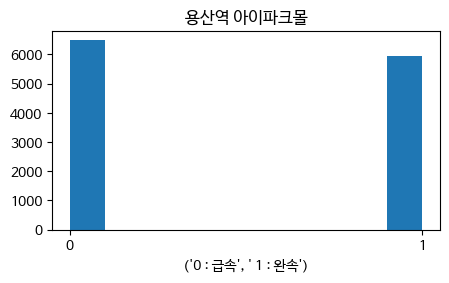

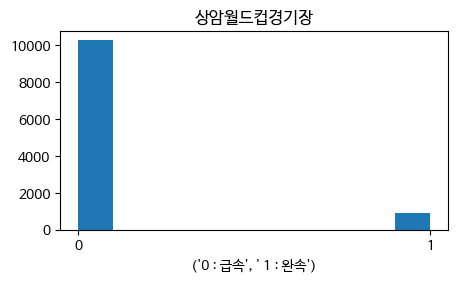

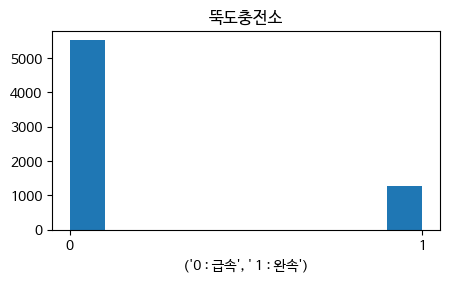

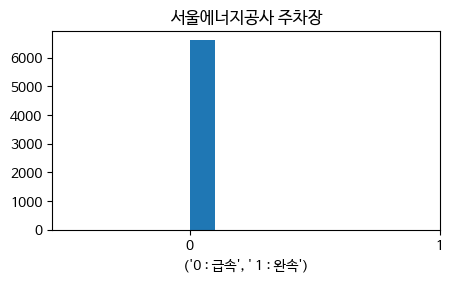

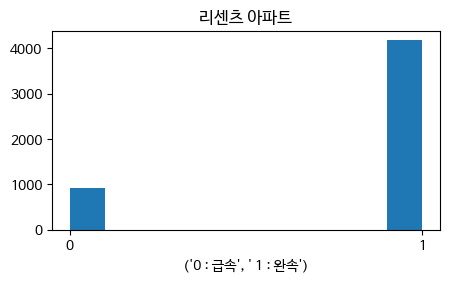

In [27]:
# 충전소 명에서 데이터가 많은 상위 5개 추출
a = 1
for _ in df['충전소명'].value_counts()[:5].index:

    target_df = df[df['충전소명'] == _]

    col_two = ['충전구분_le','자치구_le', '충전소명_le', '충전기용량', '충전량', '총_충전분', '평일_주말_le']                                                                                      # 시작, 종료 데이터는 생략, 충전시간, 충전분 두개 컬럼 합친 총_충전분
    total_df = target_df[col_two]

    str = '0 : ' + le_type[0], ' 1 : ' + le_type[1]
    plt.figure(figsize=(5, 15))
    plt.subplot(5, 1, a)
    plt.hist(x=total_df['충전구분_le'])
    plt.xlabel(str)
    plt.xticks([0,1])

    plt.title(_)
    plt.show()
    a = a + 1

# 위에서 분포도에서 용산역 아이파크몰를 타겟으로 설정

In [28]:
# 수치화 진행된 컬럼 -> 데이터프레임으로 만들기
col_total = ['충전구분_le', '자치구_le', '충전소명_le','충전기용량', '충전량', '충전시간', '충전분', '총_충전분','시작_연도', '시작_월', '시작_일', '종료_연도', '종료_월', '종료_일', '평일_주말_le']
col_one = ['충전구분_le', '자치구_le', '충전소명_le','충전기용량', '충전량', '총_충전분', '시작_연도', '시작_월', '시작_일', '종료_연도', '종료_월', '종료_일', '평일_주말_le']       # 시작, 종료 데이터, 충전시간, 충전분 사용한 데이터
col_two = ['충전구분_le','자치구_le', '충전소명_le', '충전기용량', '충전량', '총_충전분', '평일_주말_le']                                                                                      # 시작, 종료 데이터는 생략, 충전시간, 충전분 두개 컬럼 합친 총_충전분

In [29]:
target_df = df[df['충전소명'] == '용산역 아이파크몰']

In [30]:
# 전체컬럼
total_df = target_df[col_total]
total_df.corr()

,충전구분_le,자치구_le,충전소명_le,충전기용량,충전량,충전시간,충전분,총_충전분,시작_연도,시작_월,시작_일,종료_연도,종료_월,종료_일,평일_주말_le
충전구분_le,1.000000,NaN,NaN,-1.000000,-0.551654,0.454582,-0.004091,0.459535,NaN,-0.015897,-0.009083,NaN,-0.015751,-0.009506,-0.061802
자치구_le,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
충전소명_le,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
충전기용량,-1.000000,NaN,NaN,1.000000,0.551654,-0.454582,0.004091,-0.459535,NaN,0.015897,0.009083,NaN,0.015751,0.009506,0.061802
충전량,-0.551654,NaN,NaN,0.551654,1.000000,0.130329,0.085672,0.151612,NaN,0.062039,0.013667,NaN,0.062022,0.014680,0.018652
충전시간,0.454582,NaN,NaN,-0.454582,0.130329,1.000000,-0.169172,0.974260,NaN,0.023466,-0.003081,NaN,0.023694,-0.001748,0.007362
충전분,-0.004091,NaN,NaN,0.004091,0.085672,-0.169172,1.000000,0.057359,NaN,0.006732,0.008655,NaN,0.006666,0.009564,-0.005751
총_충전분,0.459535,NaN,NaN,-0.459535,0.151612,0.974260,0.057359,1.000000,NaN,0.025309,-0.001142,NaN,0.025525,0.000417,0.006142
시작_연도,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
시작_월,-0.015897,NaN,NaN,0.015897,0.062039,0.023466,0.006732,0.025309,NaN,1.000000,0.025554,NaN,0.999980,0.026087,0.016904


# 히트맵으로 확인
plt.figure(figsize=(18, 8))
sns.heatmap(data = total_df.corr(), annot=True)
plt.title('전체 컬럼')
plt.xticks(rotation=0)
plt.show()

In [31]:
# col_one 컬럼
one_df = target_df[col_one]
one_df.corr()

,충전구분_le,자치구_le,충전소명_le,충전기용량,충전량,총_충전분,시작_연도,시작_월,시작_일,종료_연도,종료_월,종료_일,평일_주말_le
충전구분_le,1.000000,NaN,NaN,-1.000000,-0.551654,0.459535,NaN,-0.015897,-0.009083,NaN,-0.015751,-0.009506,-0.061802
자치구_le,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
충전소명_le,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
충전기용량,-1.000000,NaN,NaN,1.000000,0.551654,-0.459535,NaN,0.015897,0.009083,NaN,0.015751,0.009506,0.061802
충전량,-0.551654,NaN,NaN,0.551654,1.000000,0.151612,NaN,0.062039,0.013667,NaN,0.062022,0.014680,0.018652
총_충전분,0.459535,NaN,NaN,-0.459535,0.151612,1.000000,NaN,0.025309,-0.001142,NaN,0.025525,0.000417,0.006142
시작_연도,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
시작_월,-0.015897,NaN,NaN,0.015897,0.062039,0.025309,NaN,1.000000,0.025554,NaN,0.999980,0.026087,0.016904
시작_일,-0.009083,NaN,NaN,0.009083,0.013667,-0.001142,NaN,0.025554,1.000000,NaN,0.025780,0.997223,-0.008132
종료_연도,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
one_df.head(2)

,충전구분_le,자치구_le,충전소명_le,충전기용량,충전량,총_충전분,시작_연도,시작_월,시작_일,종료_연도,종료_월,종료_일,평일_주말_le
378041,1,20,465,7,4.79,91,2021,1,1,2021,1,1,1
378044,0,20,465,50,51.39,80,2021,1,1,2021,1,1,1


# 히트맵으로 확인
plt.figure(figsize=(18, 8))
sns.heatmap(data = one_df.corr(), annot=True)
plt.title('전체 컬럼')
plt.xticks(rotation=0)
plt.show()

In [33]:
# col_one 컬럼
two_df = target_df[col_two]
two_df.corr()

,충전구분_le,자치구_le,충전소명_le,충전기용량,충전량,총_충전분,평일_주말_le
충전구분_le,1.000000,NaN,NaN,-1.000000,-0.551654,0.459535,-0.061802
자치구_le,NaN,NaN,NaN,NaN,NaN,NaN,NaN
충전소명_le,NaN,NaN,NaN,NaN,NaN,NaN,NaN
충전기용량,-1.000000,NaN,NaN,1.000000,0.551654,-0.459535,0.061802
충전량,-0.551654,NaN,NaN,0.551654,1.000000,0.151612,0.018652
총_충전분,0.459535,NaN,NaN,-0.459535,0.151612,1.000000,0.006142
평일_주말_le,-0.061802,NaN,NaN,0.061802,0.018652,0.006142,1.000000


In [34]:
two_df.head(2)

,충전구분_le,자치구_le,충전소명_le,충전기용량,충전량,총_충전분,평일_주말_le
378041,1,20,465,7,4.79,91,1
378044,0,20,465,50,51.39,80,1


# 히트맵으로 확인
plt.figure(figsize=(10, 5))
sns.heatmap(data = two_df.corr(), annot=True)
plt.title('전체 컬럼')
plt.xticks(rotation=0)
plt.show()

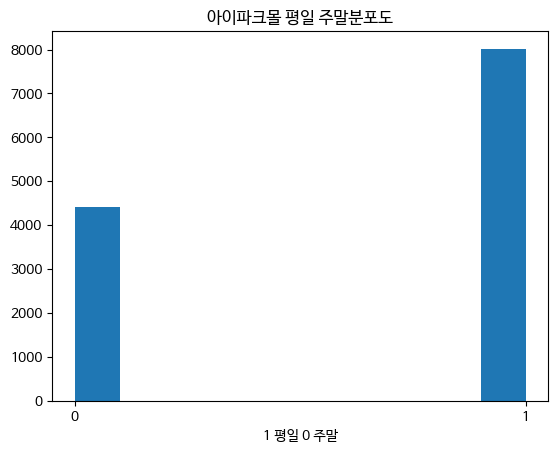

In [35]:
# 용산역 아이파크몰에서 평일 주말 데이터가 골고루 되어있는지 분포도 확인
plt.hist(x=two_df['평일_주말_le'])

plt.title('아이파크몰 평일 주말분포도')
plt.xlabel('1 평일 0 주말')
plt.xticks([0,1])

plt.show()

위 그래프에서 평일, 주말 데이터들이 골고루 분포가 안되어있다는 것을 확인.
<br>그래서 평일 데이터와 주말 데이터를 골고루 분포되게.. 평일데이터를 일부 제거.

In [36]:
# 평일이면서 급속
work_zero = two_df[(two_df['평일_주말_le'] == 1 ) & (total_df['충전구분_le'] == 0) ]
work_zero.head(2)

,충전구분_le,자치구_le,충전소명_le,충전기용량,충전량,총_충전분,평일_주말_le
378044,0,20,465,50,51.39,80,1
378052,0,20,465,50,5.51,218,1


In [37]:
work_zero.shape

(4369, 7)

In [38]:
# 평일이면서 완속
work_one = two_df[(two_df['평일_주말_le'] == 1 ) & (total_df['충전구분_le'] == 1) ]
work_one.head(2)

,충전구분_le,자치구_le,충전소명_le,충전기용량,충전량,총_충전분,평일_주말_le
378041,1,20,465,7,4.79,91,1
378057,1,20,465,7,4.82,43,1


In [39]:
work_one.shape

(3649, 7)

In [40]:
# 주말이면서 급속
rest_zero = two_df[(two_df['평일_주말_le'] == 0 ) & (total_df['충전구분_le'] == 0) ]
rest_zero.shape

(2117, 7)

In [41]:
# 주말이면서 완속
rest_one = two_df[(two_df['평일_주말_le'] == 0 ) & (total_df['충전구분_le'] == 1) ]
rest_one.shape

(2290, 7)

평일 데이터는 : 8018<br>
주말 데이터는 : 4407<br>

평일 급속, 평일 완속 데이터를 각각 1805개씩 삭제를 하면 된다.

In [42]:
work_zero.index[:1805]

Int64Index([378044, 378052, 378053, 378063, 378078, 378086, 378091, 378098,
            378112, 378114,
            ...
            405555, 405558, 405564, 405585, 405613, 405614, 405630, 405632,
            405634, 405646],
           dtype='int64', length=1805)

In [43]:
work_zero_index = work_zero.index[:1805].to_list()

In [44]:
# 평일 급속 데이터 1805개 삭제
# loc이용해서 행삭제해야됨...
two_df.drop(index=work_zero_index, inplace=True)
two_df.shape

<ipython-input-44-60629a3d0afe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  two_df.drop(index=work_zero_index, inplace=True)


(10620, 7)

In [45]:
work_one_index = work_one.index[:1805].to_list()

In [46]:
# 평일 완속 데이터 1805개 삭제
two_df.drop(index=work_one_index, inplace=True)
two_df.shape

<ipython-input-46-5905af113ae1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  two_df.drop(index=work_one_index, inplace=True)


(8815, 7)

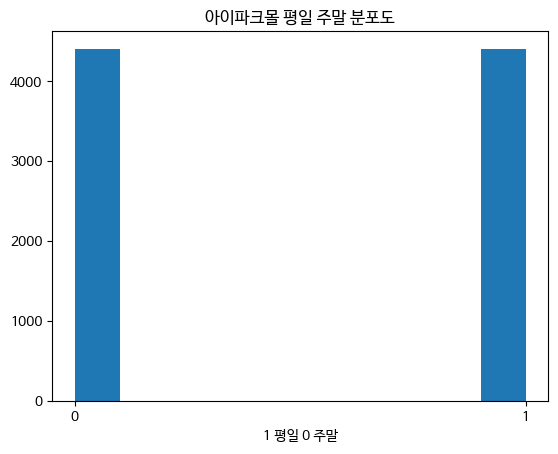

In [47]:
plt.hist(x=two_df['평일_주말_le'])
plt.xlabel('1 평일 0 주말')
plt.xticks([0,1])
plt.title('아이파크몰 평일 주말 분포도')

plt.show()

위 분포도를 확인해보면 균등하게 되어있는 것을 확인했다.

In [48]:
# 급속
fast = total_df[total_df['충전구분_le'] == 0]
fast.head()

,충전구분_le,자치구_le,충전소명_le,충전기용량,충전량,충전시간,충전분,총_충전분,시작_연도,시작_월,시작_일,종료_연도,종료_월,종료_일,평일_주말_le
378044,0,20,465,50,51.39,1,20,80,2021,1,1,2021,1,1,1
378052,0,20,465,50,5.51,3,38,218,2021,1,1,2021,1,1,1
378053,0,20,465,50,19.54,2,6,126,2021,1,1,2021,1,1,1
378063,0,20,465,50,10.00,0,28,28,2021,1,1,2021,1,1,1
378078,0,20,465,50,30.45,0,43,43,2021,1,1,2021,1,1,1


In [49]:
# 완속
slow= total_df[total_df['충전구분_le'] == 1]
slow.head()

,충전구분_le,자치구_le,충전소명_le,충전기용량,충전량,충전시간,충전분,총_충전분,시작_연도,시작_월,시작_일,종료_연도,종료_월,종료_일,평일_주말_le
378041,1,20,465,7,4.79,1,31,91,2021,1,1,2021,1,1,1
378057,1,20,465,7,4.82,0,43,43,2021,1,1,2021,1,1,1
378059,1,20,465,7,1.35,0,24,24,2021,1,1,2021,1,1,1
378077,1,20,465,7,7.83,1,11,71,2021,1,1,2021,1,1,1
378092,1,20,465,7,1.24,0,21,21,2021,1,1,2021,1,1,1


In [50]:
print('급속 이용자의 충전량 : ', fast['충전량'].mean(), '\n충전_분 : ', fast['총_충전분'].mean())

급속 이용자의 충전량 :  27.976036077705828 
충전_분 :  51.43015726179463


In [51]:
print('완속 이용자의 충전량 : ', slow['충전량'].mean(), '\n충전_분 : ', slow['총_충전분'].mean())

완속 이용자의 충전량 :  10.103123421451423 
충전_분 :  120.37632598080485


In [52]:
fast_one = two_df[(two_df['충전구분_le'] == 0) & (two_df['평일_주말_le'] == 1 )]
print('평일 급속', '\n충전량 평균 : ', fast_one['충전량'].mean(), '\n총_충전분 평균', fast_one['총_충전분'].mean())

fast_zero = two_df[(two_df['충전구분_le'] == 0) & (two_df['평일_주말_le'] == 0 )]
print('주말 급속', '\n충전량 평균 : ', fast_zero['충전량'].mean(), '\n총_충전분 평균', fast_zero['총_충전분'].mean())

slow_one = two_df[(two_df['충전구분_le'] == 1) & (two_df['평일_주말_le'] == 1 )]
print('평일 완속', '\n충전량 평균 : ', slow_one['충전량'].mean(), '\n총_충전분 평균', slow_one['총_충전분'].mean())

slow_zero = two_df[(two_df['충전구분_le'] == 1) & (two_df['평일_주말_le'] == 0 )]
print('주말 완속', '\n충전량 평균 : ', slow_zero['충전량'].mean(), '\n총_충전분 평균', slow_zero['총_충전분'].mean())

평일 급속 
충전량 평균 :  28.24693057722309 
총_충전분 평균 50.64976599063962
주말 급속 
충전량 평균 :  29.361511572980636 
총_충전분 평균 53.75814832309872
평일 완속 
충전량 평균 :  10.943850325379609 
총_충전분 평균 128.89045553145337
주말 완속 
충전량 평균 :  9.470991266375545 
총_충전분 평균 111.50436681222708


### 결과
용산역 아이파크몰 이용자 데이터에서 충전 구분, 평일-주말에 해당하는 데이터를 확인 해본결과 걸리는 시간을 예측할 수 있다.../

- 평일 급속<br>
    - 충전량 평균 : 28.24693057722309 <br>
    - 총_충전분 평균 : 50.64976599063962<br>
- 주말 급속<br>
    - 충전량 평균 : 29.361511572980636<br>
    - 총_충전분 평균 : 53.75814832309872<br>
- 평일 완속<br>
    - 충전량 평균 : 10.943850325379609<br>
    - 총_충전분 평균 : 128.89045553145337<br>
- 주말 완속<br>
    - 충전량 평균 : 9.470991266375545<br>
    - 총_충전분 평균 : 111.50436681222708<br>


이를 통해서 급속 이용자, 완속이용자가 셀프 주유소처럼 kWh(킬로와트시)로 지정하면 걸리는 총 분을 예측하는 모델설계.<br>
전기차라는 절대값을 씌우고 해석했습니다.

## 셀프주유소처럼 kWh 지정후 걸리는 시간 예측 모델

사용할 모델<br>
- 로지스틱 회귀<br>
- 결정트리<br>
- 선형회귀<br>
- 서포트 백터<br>

In [53]:
# 데이터 분리
from sklearn.model_selection import train_test_split

# 모델 선언
from sklearn.linear_model import LogisticRegression          # 로지스틱 회귀
from sklearn.tree import DecisionTreeRegressor               # 결정트리 회귀
from sklearn.linear_model import LinearRegression            # 선형회귀

# 표준화 및 정규화
from sklearn.preprocessing import StandardScaler            # 표준화
from sklearn.preprocessing import MinMaxScaler              # 정규화

# 평가 지표
from sklearn.metrics import mean_squared_error              # MSE
from sklearn.metrics import mean_absolute_error             # MAE
from sklearn.metrics import r2_score                        # R2

# 최적의 하이퍼파라미터
from sklearn.model_selection import GridSearchCV

# 앙상블 모델


In [54]:
# 사용할 데이터 프레임은
two_df.head(3)

,충전구분_le,자치구_le,충전소명_le,충전기용량,충전량,총_충전분,평일_주말_le
378143,1,20,465,7,11.19,102,0
378149,0,20,465,50,15.97,30,0
378160,1,20,465,7,11.05,205,0


In [55]:
select_col = ['충전구분_le', '자치구_le', '충전소명_le', '충전기용량', '충전량', '총_충전분', '평일_주말_le']
two_df[select_col].head(2)

,충전구분_le,자치구_le,충전소명_le,충전기용량,충전량,총_충전분,평일_주말_le
378143,1,20,465,7,11.19,102,0
378149,0,20,465,50,15.97,30,0


In [56]:
target = two_df['총_충전분']

In [58]:
train_input, test_input, train_target, test_target = train_test_split(
    two_df.drop(columns='총_충전분'), target, random_state=42, train_size=0.8, shuffle=True
)

In [59]:
# 모델 학습을 진행 중에 충전량 컬럼이 정규화 필요하다는 에러가 발생!! 표준화, 정규화 진행.
ss = StandardScaler()
train_input_ss = ss.fit_transform(train_input)
test_input_ss = ss.fit_transform(test_input)

In [60]:
mm = MinMaxScaler()
train_input_mm = mm.fit_transform(train_input)
test_input_mm = mm.fit_transform(test_input)

### 결정트리

In [61]:
par = {
    'max_depth' : [1, 3, 5, 7, 9, 11]
}

dtc = DecisionTreeRegressor(random_state=42)
gs = GridSearchCV(dtc, param_grid=par, cv=3, n_jobs=-1)

dtc_gs = gs.fit(train_input, train_target)
dtc_gs_best = dtc_gs.best_params_['max_depth']

print('결정 트리 최적의 하이퍼 파라미터 : ', dtc_gs_best)

결정 트리 최적의 하이퍼 파라미터 :  5


In [62]:
# 그리드 서치후 학습
dtc = DecisionTreeRegressor(max_depth=dtc_gs_best, random_state=42)
dtc.fit(train_input, train_target)
dtc_predict = dtc.predict(test_input)

In [63]:
# 회귀모델 성능 평가 - MSE (평균 제곱 오차)
from sklearn.metrics import mean_squared_error
dtc_mse = mean_squared_error(test_target, dtc_predict)

# 회귀모델 성능 평가 - MAE (평균 절대 오차)
from sklearn.metrics import mean_absolute_error
dtc_mae = mean_absolute_error(test_target, dtc_predict)

# # 회귀모델 성능 평가 - R2 (분산 기반으로 예측 성능 평가)
from sklearn.metrics import r2_score
dtc_r2 = r2_score(test_target, dtc_predict)

In [64]:
print('모델 학습률 : ', dtc.score(train_input, train_target), '\n모델 테스트율 : ', dtc.score(test_input, test_target), '\n모델 평가 - MSE : ',  dtc_mse, '\n모델 평가 - MAE : ', dtc_mae, '\n모델 평가 - R2 : ', dtc_r2)

모델 학습률 :  0.8380855739129973 
모델 테스트율 :  0.7710033299211447 
모델 평가 - MSE :  1189.552851870927 
모델 평가 - MAE :  20.05161330497271 
모델 평가 - R2 :  0.7710033299211447


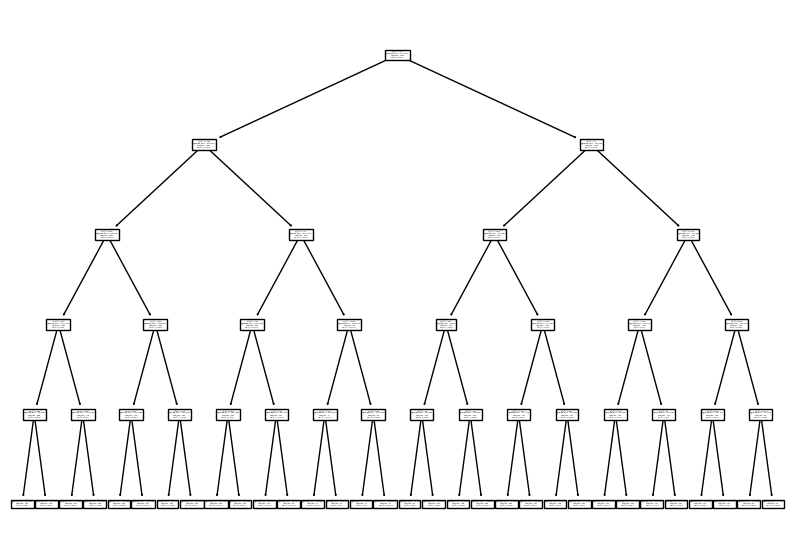

In [65]:
# 트리모델 시각화
from sklearn.tree import plot_tree      # 결정 트리 그림으로 확인할수있는 메소드

plt.figure(figsize=(10,7))              # size 지정
plot_tree(dtc)                           # 맷폴라이브에서 트리그림 확인
plt.show()

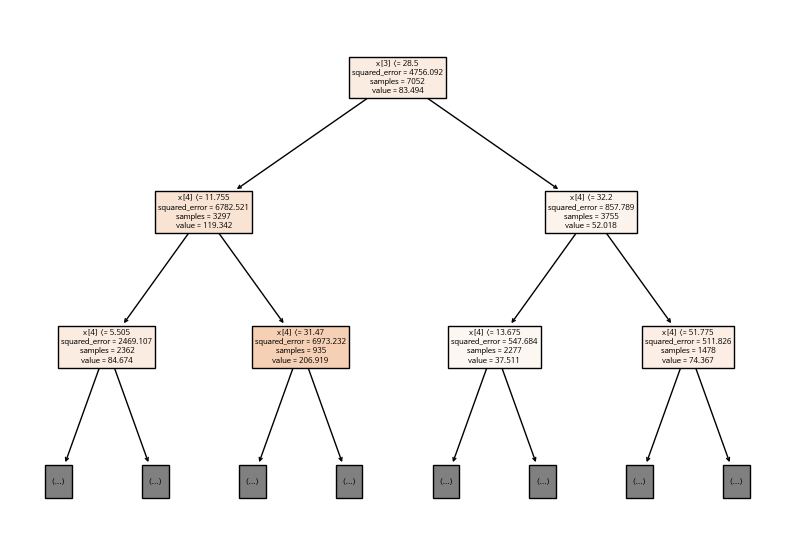

In [66]:
plt.figure(figsize=(10,7))
plot_tree(dtc, max_depth=2, filled=True)

plt.show()

### 로지스틱 회귀 잠시..

par = {
    'C' : [0.01, 0.1, 1, 10 , 100],
    'penalty' : ['l1', 'l2']
}
lr = LogisticRegression(random_state=42, max_iter=2500, n_jobs=-1)
lr_gs = GridSearchCV(lr, param_grid=par, n_jobs=-1, cv=3)
lr_gs.fit(train_input, train_target)
lr_best = lr_gs.best_params_['C']

lr_best

lr = LogisticRegression(C=lr_best, random_state=42, max_iter=2500, n_jobs=-1)
lr.fit(train_input, train_target)
lr_predict = lr.predict(test_input)

print('모델 학습률 : ', lr.score(train_input, train_target), '\n모델 테스트율 : ', lr.score(test_input, test_target), '\n모델 테스트 평가율 : ', lr_acc)

### 선형 회귀

In [67]:
from sklearn.linear_model import LinearRegression

lin_r = LinearRegression()
lin_r.fit(train_input, train_target)
lin_predict = lin_r.predict(test_input)

In [68]:
# 회귀모델 성능 평가 - MSE (평균 제곱 오차)
lin_r_mse = mean_squared_error(test_target, dtc_predict)

# 회귀모델 성능 평가 - MAE (평균 절대 오차)
lin_r_mae = mean_absolute_error(test_target, dtc_predict)

# # 회귀모델 성능 평가 - R2 (분산 기반으로 예측 성능 평가)
lin_r_r2 = r2_score(test_target, dtc_predict)

In [69]:
print('모델 학습률 : ', lin_r.score(train_input, train_target), '\n모델 테스트율 : ', lin_r.score(test_input, test_target), '\n모델 평가 - MSE : ',  lin_r_mse, '\n모델 평가 - MAE : ', lin_r_mae, '\n모델 평가 - R2 : ', lin_r_r2)

모델 학습률 :  0.5112498240059351 
모델 테스트율 :  0.4656297622842609 
모델 평가 - MSE :  1189.552851870927 
모델 평가 - MAE :  20.05161330497271 
모델 평가 - R2 :  0.7710033299211447


#  

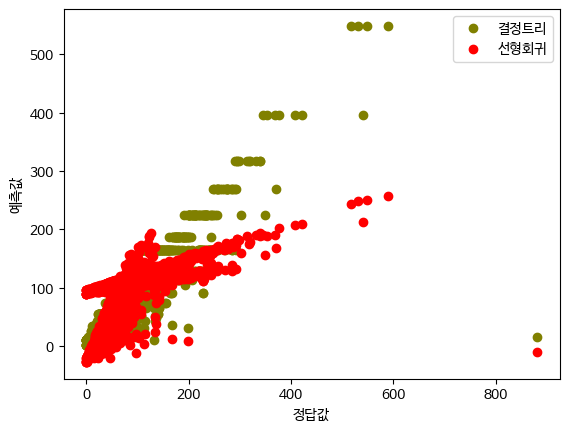

In [70]:
# 정답에 대한
plt.scatter(test_target, dtc_predict, color='olive', label='결정트리')
plt.scatter(test_target, lin_predict, color='red', label='선형회귀')

plt.legend()
plt.xlabel('정답값')
plt.ylabel('예측값')

plt.show()